Objectives:
- Watch if the NORMALIZATION and CENTERED the signal around the MEAN or the MEDIAN have an impact on the feature values (for all the songs)


# Imports

In [1]:
# Fixed plots
%matplotlib inline
# Dynamic plots
# %matplotlib notebook

import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import sys
import math

import birdsonganalysis as bsa
import utils

sys.path.append('../model/')
from synth import synthesize
from measures import bsa_measure, normalize_and_center
from song_model import SongModel

np.set_printoptions(precision=3)

# Function and variable definitions

In [6]:
# Generation of the tutor song and the normalized & centered tutor song
song_name = "boari_short"

sr, tutor = wavfile.read('../data/{}.wav'.format(song_name))

# nct: normalized centered tutor
nct = normalize_and_center(tutor)

# CENTERED with the median:
nct_tmp = tutor.astype(np.int32)
nct_tmp = 2 * (nct_tmp - nct_tmp.min()) / (nct_tmp.max() - nct_tmp.min()) - 1
med_nct = nct_tmp - np.median(nct_tmp)

print("mean:", nct_tmp.mean())
print("median:", np.median(nct_tmp))

mean: -0.09673622387027749
median: -0.09737238493723854


# Sound waves and spectral derivatives 

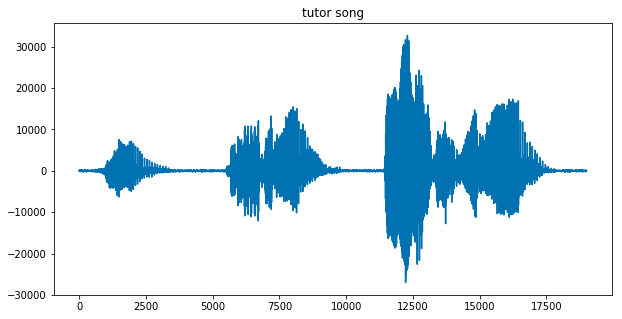

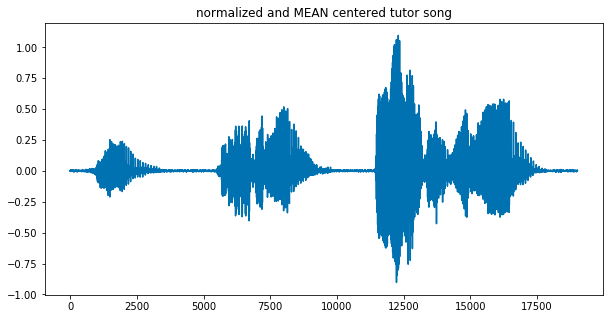

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(tutor)
plt.title("tutor song")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(nct)
plt.title("normalized and MEAN centered tutor song")
plt.show()

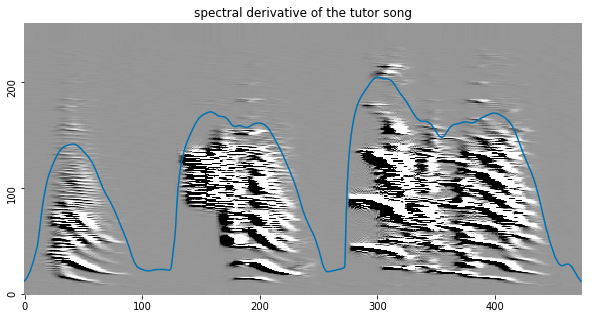

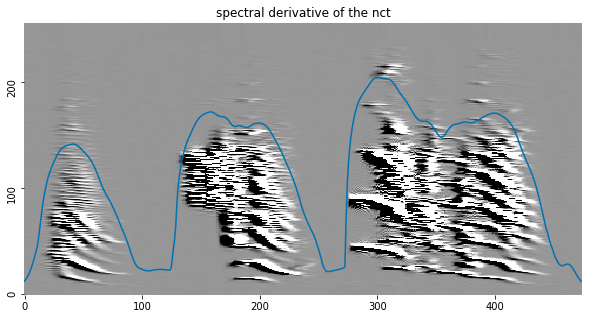

In [8]:
# Spectral derivatives
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
nctspec = bsa.spectral_derivs(nct, 256, 40, 1024)

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
bsa.plot_over_spec(bsa.song_amplitude(tutor, 256, 40, 1024), ax=ax)
plt.title("spectral derivative of the tutor song")
plt.show(fig)

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(nctspec, contrast=0.01, ax=ax)
bsa.plot_over_spec(bsa.song_amplitude(nct, 256, 40, 1024), ax=ax)
plt.title("spectral derivative of the nct")
plt.show(fig)

# Features comparison

# Features dict

In [9]:
tutor_feat = bsa.all_song_features(tutor, sr, freq_range=256, fft_size=1024, fft_step=40)
nct_feat = bsa.all_song_features(nct, sr, freq_range=256, fft_size=1024, fft_step=40)
med_nct_feat = bsa.all_song_features(med_nct, sr, freq_range=256, fft_size=1024, fft_step=40)

# Plots of features evolution during the song

In [10]:
fnames = ['fm', 'am', 'entropy', 'goodness', 'amplitude']

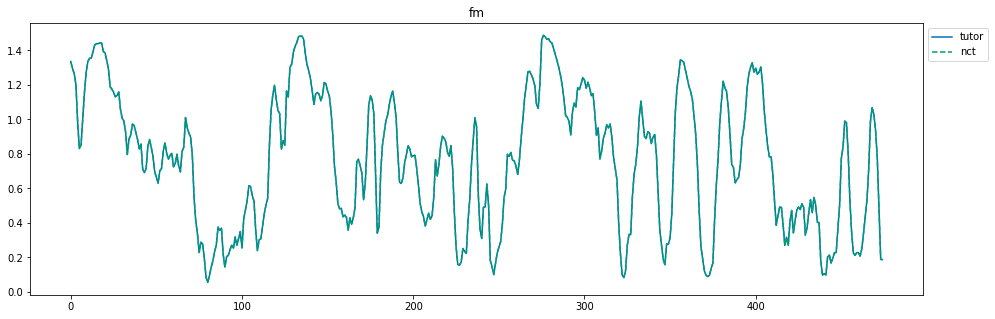

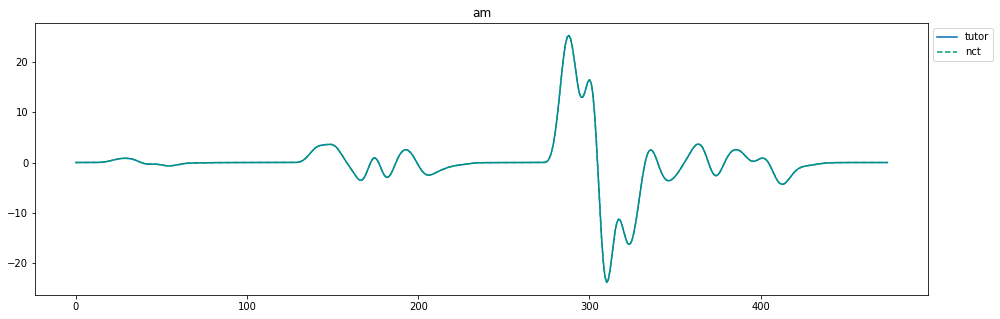

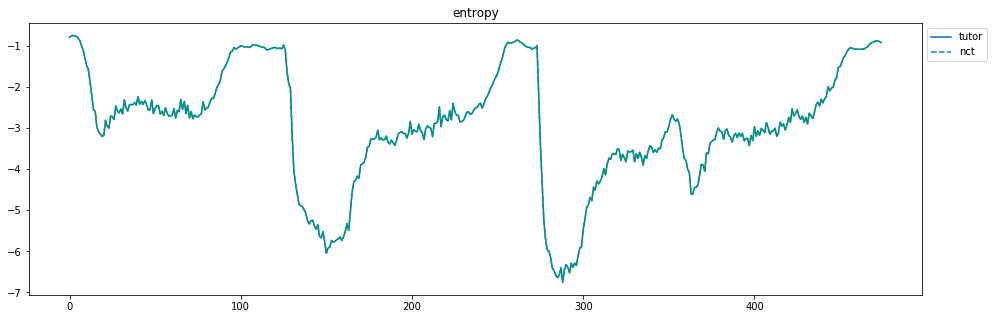

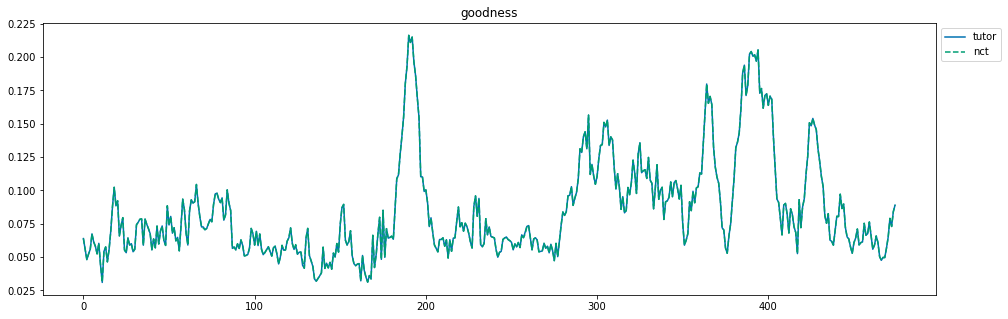

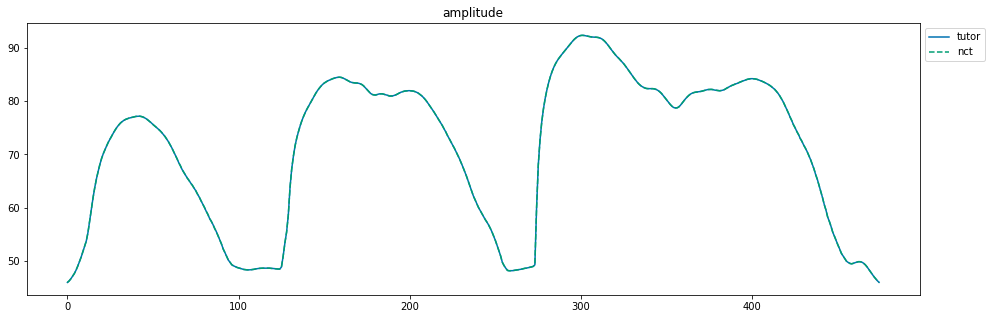

In [11]:
for feat in fnames:
    plt.figure(figsize=(16, 5))
    plt.plot(tutor_feat[feat], label="tutor")
    plt.plot(nct_feat[feat], linestyle='dashed', label="nct")
    plt.title(feat)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

In [12]:
for feat in fnames:
    print("sum of differences in {}: {}".format(feat, np.sum(tutor_feat[feat] - nct_feat[feat])))

sum of differences in fm: 0.00012797400939704162
sum of differences in am: -1.6658313306588046e-07
sum of differences in entropy: 5.039753113900147e-05
sum of differences in goodness: -0.002336677108599982
sum of differences in amplitude: 1.8542159203605024e-05


# MEDIAN

sum of differences in fm: -0.3614268090049897
sum of differences in am: 0.0005520685239182469
sum of differences in entropy: -0.15352644785657832
sum of differences in goodness: -3.7708327785157385
sum of differences in amplitude: -0.1521480692167856


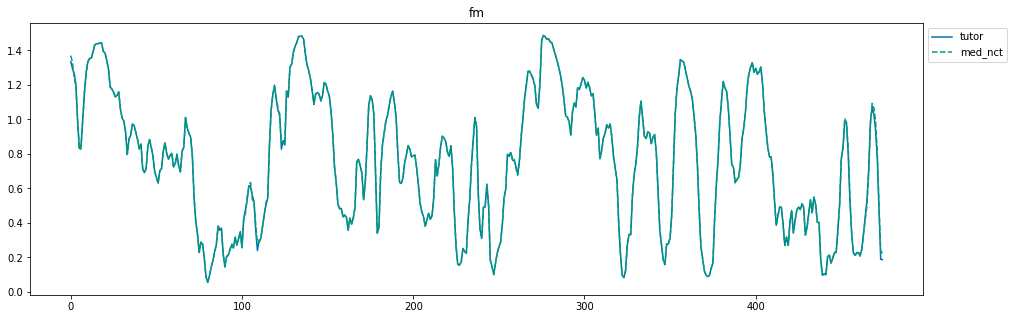

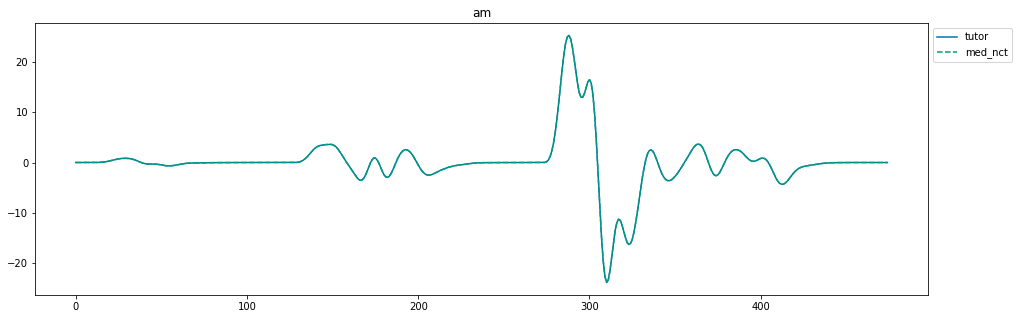

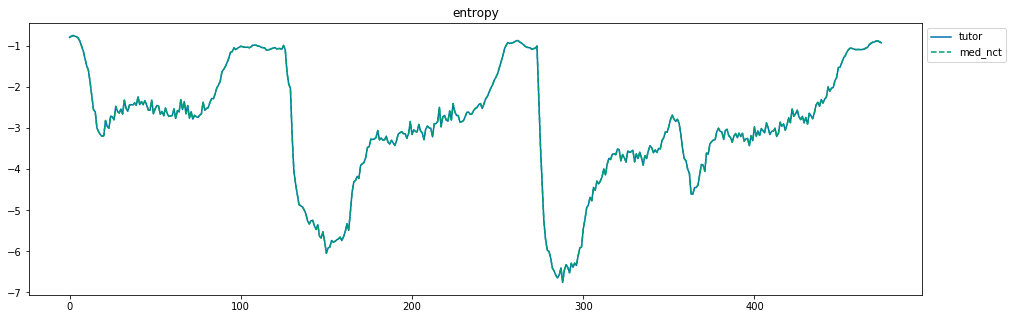

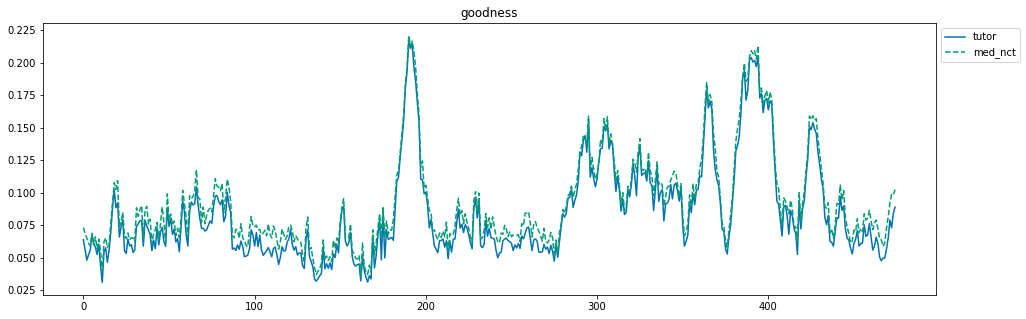

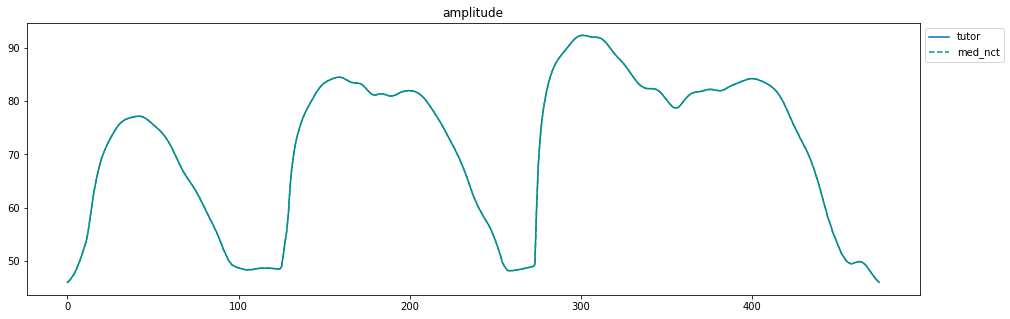

In [13]:
for feat in fnames:
    plt.figure(figsize=(16, 5))
    plt.plot(tutor_feat[feat], label="tutor")
    plt.plot(med_nct_feat[feat], linestyle='dashed', label="med_nct")
    plt.title(feat)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
for feat in fnames:
    print("sum of differences in {}: {}".format(feat, np.sum(tutor_feat[feat] - med_nct_feat[feat])))